In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm_notebook

In [3]:
driver = webdriver.Chrome("/data/chromedriver")
driver.get("https://gwangjin.eminwon.seoul.kr/emwp/gov/mogaha/ntis/web/emwp/cmmpotal/action/EmwpMainMgtAction.do")

C:\Users\acorn\AppData\Local\Temp\ipykernel_16336\653880136.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/data/chromedriver")


In [4]:
ul = driver.find_element(By.CLASS_NAME, "menu-list")
ul.find_element(By.TAG_NAME, "a").click()

In [5]:
ul2 = driver.find_element(By.CLASS_NAME, "all-menu-list")
ul2.find_elements(By.TAG_NAME, "a")[1].click()

In [6]:
claim_list = []
for i in tqdm_notebook(range(2, 22)):
    navi = driver.find_element(By.ID, "navigator")
    if i % 10 == 1:
            navi.find_element(By.CLASS_NAME, "navi-arrow-single-right").click()
    else :
            navi.find_element(By.LINK_TEXT, str(i)).click()
    claim_list.extend([i.text for i in driver.find_elements(By.CLASS_NAME, "td-list")])
    
    time.sleep(1)

C:\Users\acorn\AppData\Local\Temp\ipykernel_16336\2600213045.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(2, 22)):


  0%|          | 0/20 [00:00<?, ?it/s]

In [117]:
claim_list = str(claim_list)

In [118]:
f = open('data/claim_list.txt', "w")
f.write(claim_list)
f.close()

In [119]:
from wordcloud import WordCloud
import wordcloud
from wordcloud import ImageColorGenerator
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

In [120]:
okt = Okt()
token_ko = okt.nouns(claim_list)
len(token_ko)

2231

In [121]:
stop_words = ["은", "는", "이", "가", "제", "의", "을", "를", "에서", "부터", 
              "와", "과", "및", "까지", "하여", "해서", "요", "우", "동", "조",
             "친", "로써", "함", "것", "월", "일", "그", "정", "수", "인", "장",
             "관", "위", "항", "때", "번", "기", "등", "및", "때문", "떼",
             "구", "후", "대한", "관련", "문의", "여부", "건", "내", "좀", "요청", "앞",
             "민원", "행정", "광진", "광진구", "접수", "추가", "설치", "옆", "중곡", 
              "자양", "공원", "공사", "쓰레기"]

In [122]:
token_ko = [word for word in token_ko if word not in stop_words]
len(token_ko)

1783

In [123]:
ko = nltk.Text(token_ko, name = "광진구 민원")
data = ko.vocab().most_common(150)

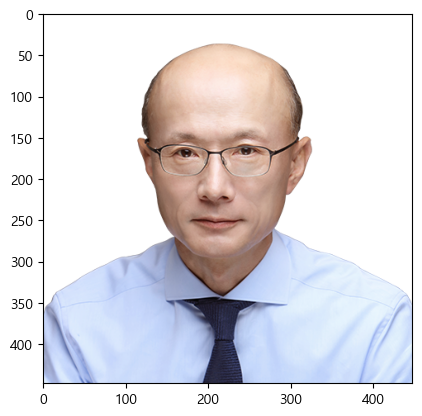

In [124]:
from PIL import Image

hanseokwon = np.array(Image.open("data/wordcloud/hanseokwon.png")) 
hanseokwon.shape

plt.imshow(hanseokwon)

(-0.5, 447.5, 447.5, -0.5)

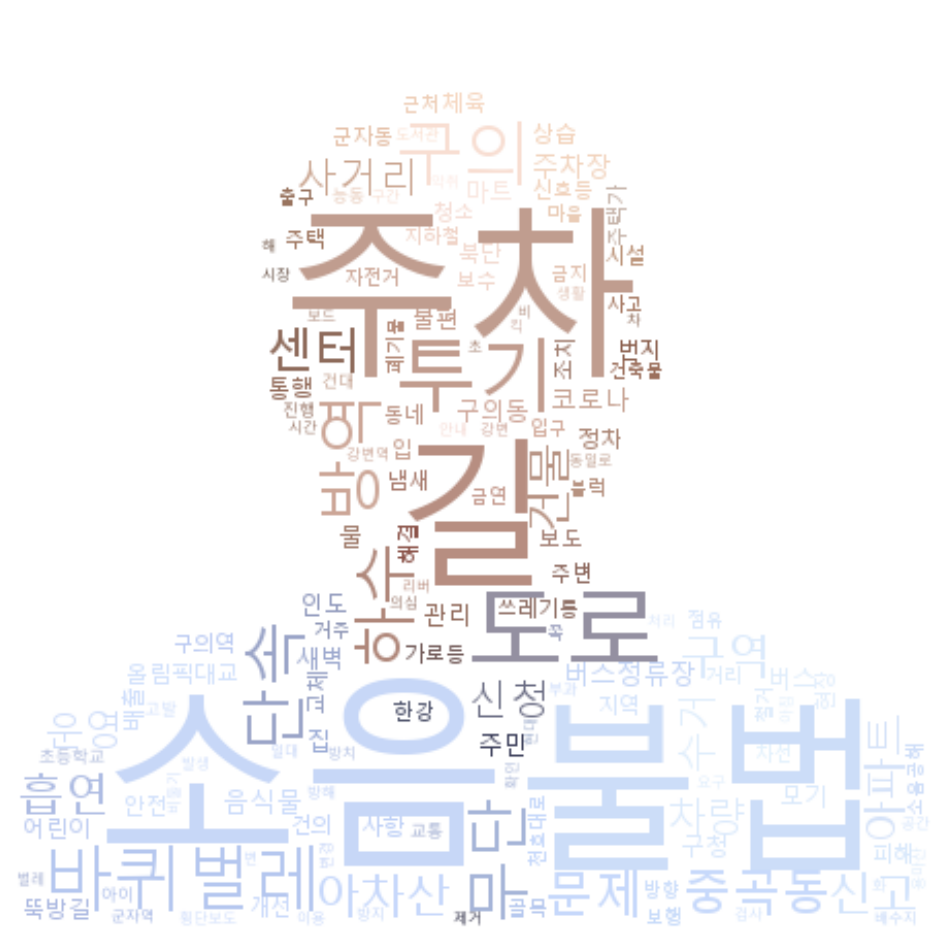

In [129]:
wc = WordCloud(max_font_size = 100, background_color = "white",
              max_words = 500, mask = hanseokwon,
              font_path = "C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(data))  

image_colors = wordcloud.ImageColorGenerator(hanseokwon)

plt.figure(figsize = (12,12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")

In [126]:
s = pd.Series(token_ko)
s.value_counts()

소음    34
불법    27
주차    25
길     19
도로    18
      ..
분진     1
고통     1
주의     1
경복     1
집합     1
Length: 838, dtype: int64